# Часть 0

In [1]:
import random
import numpy.random as rnd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from IPython.display import display

class FunctionWrapper:
    def __init__(self, name, f, a, b, e, der):
        self.f = f # function
        self.der = der # deriative
        self.a = a # bounds
        self.b = b #
        self.e = e # accuracy
        self.name = name
    def __str__(self):
        return self.name + " on " + "[" + str(self.a) + ", " + str(self.b) + "]"
        
        
class OptimizeResult:
    def __init__(self, method_name, f: FunctionWrapper, iterations, calls, result, data):
        self.iterations  = iterations
        self.method_name = method_name
        self.f           = f
        self.calls       = calls
        self.result      = result
        self.data        = data
       
    def __str__(self):
        return "Result of " + self.method_name + " for {" + str(self.f) + "} is " + str(self.result)

# Часть 1: методы одномерного поиска

## Метод дихотомии

In [2]:
def dichotomy(w: FunctionWrapper) -> OptimizeResult:
    result = OptimizeResult("dichotomy", w, 0, 0, 0, [])
    
    d = random.uniform(0.2, 1.0) * (w.e / 2)
    
    a = w.a
    b = w.b
    while (b - a > w.e):
        result.data.append((a, b))
        x1 = (a + b) / 2 - d
        x2 = (a + b) / 2 + d
        y1 = w.f(x1)
        y2 = w.f(x2)
        
        if (y1 < y2):
            b = x2
        elif (y2 < y1):
            a = x1
        else:
            a = x1
            b = x2
        
        result.iterations += 1
        result.calls += 2

    result.result = (a + b) / 2
    return result

## Метод золотого сечения

In [3]:
def golden_ratio(w: FunctionWrapper) -> OptimizeResult:
    result = OptimizeResult("golden ratio", w, 0, 0, 0, [])
    
    a = w.a
    b = w.b
    if (b - a < w.e):
        result.result = (a + b) / 2
        return result
    
    gr = (math.sqrt(5) + 1) / 2
    
    x1 = b - (b - a) / gr
    x2 = a + (b - a) / gr

    y1 = w.f(x1)
    y2 = w.f(x2)
    result.calls += 2

    while (b - a > w.e):
        result.data.append((a, b))
        if (y1 < y2):
            b = x2
            (x2, y2) = (x1, y1)
            x1 = b - (b - a) / gr
            y1 = w.f(x1)
        else:
            a = x1
            (x1, y1) = (x2, y2)
            x2 = a + (b - a) / gr
            y2 = w.f(x2)
        
        result.iterations += 1
        result.calls += 1

    result.result = (a + b) / 2
    return result

## Метод Фибоначчи

In [4]:
def fibonacci(w: FunctionWrapper) -> OptimizeResult:
    def fib(i):
        (a, b) = (0, 1)
        for j in range(0, i):
            temp = b
            b += a
            a = temp
        return a
    def fib_greater(t):
        (a, b) = (0, 1)
        j = 0
        while True:
            if a > t:
                return j - 2
            temp = b
            b += a
            a = temp
            j += 1

    calls = fib_greater((w.b - w.a) / w.e)
    result = OptimizeResult("fibonacci", w, 0, calls, 0, [])

    n = calls   
    x1 = w.a + (w.b - w.a) * (fib(n - 2) / fib(n))
    x2 = w.a + (w.b - w.a) * (fib(n - 1) / fib(n))
    y1 = w.f(x1)
    y2 = w.f(x2)
    a = w.a
    b = w.b
    
    while (n > 1):
        result.data.append((a, b))
        result.iterations += 1
        n -= 1
        if (y1 > y2):
            a = x1
            (x1, y1) = (x2, y2)
            x2 = a + b - x1
            y2 = w.f(x2)
        else:
            b = x2
            (x2, y2) = (x1, y1)
            x1 = a + b - x2
            y1 = w.f(x1)

    result.result = (x1 + x2) / 2
    return result

## Test

In [5]:
for eps in [0.01, 0.0005, 0.00000001]:  
    print("Eps = " + str(eps))
    f = FunctionWrapper("(x + 1)^2 + 2", 
                        lambda x: (x + 1) ** 2 + 2, 
                        -100, 100, eps, None)

    print(dichotomy(f))
    print(golden_ratio(f))
    print(fibonacci(f))
    print()

Eps = 0.01
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -0.9994163389056043
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999496256596083
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -0.9957975517116466

Eps = 0.0005
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999265683539319
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999496256596083
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -1.0004174769205463

Eps = 1e-08
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -1.0000000008866292
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999999866804884
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999786485009068



## Report

In [6]:
def report1(w: FunctionWrapper):
    for eps in [1e-1, 1e-2, 1e-4, 1e-6, 1e-7]:
        w.e = eps
        res_d = dichotomy(w)
        res_g = golden_ratio(w)
        res_f = fibonacci(w)
        
        m = max(res_d.iterations, res_g.iterations, res_f.iterations)
        values = [["None", "None", "None"] for i in range(0, m)]
        
        for i in range(0, m):
            for a in [(0, res_d), (1, res_g), (2, res_f)]:
                (ind, d) = a
                if i < len(d.data):
                    values[i][ind] = str(d.data[i])
        print("EPS: " + str(eps))
        display(pd.DataFrame(values, columns = [
            res_d.method_name + " (calls: " + str(res_d.calls) + ")", 
            res_g.method_name + " (calls: " + str(res_g.calls) + ")", 
            res_f.method_name + " (calls: " + str(res_f.calls) + ")"
        ]))

In [7]:
report1(FunctionWrapper("(x + 1)^2 + 2", lambda x: (x + 1) ** 2 + 2, -100, 100, 0, None))

EPS: 0.1


,dichotomy (calls: 24),golden ratio (calls: 18),fibonacci (calls: 16)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 0.023418178888101063)","(-100, 23.606797749978966)","(-100, 23.60688956433637)"
2,"(-50.01170908944405, 0.023418178888101063)","(-52.78640450004205, 23.606797749978966)","(-52.78622087132726, 23.60688956433637)"
3,"(-25.017563634166073, 0.023418178888101063)","(-23.606797749978966, 23.606797749978966)","(-23.60688956433637, 23.60688956433637)"
4,"(-12.520490906527087, 0.023418178888101063)","(-23.606797749978966, 5.572809000084121)","(-23.60688956433637, 5.572441742654519)"
5,"(-6.2719545427075944, 0.023418178888101063)","(-12.461179749810725, 5.572809000084121)","(-12.462006079027333, 5.572441742654519)"
6,"(-3.147686360797848, 0.023418178888101063)","(-5.572809000084121, 5.572809000084121)","(-5.572441742654519, 5.572441742654519)"
7,"(-1.5855522698429745, 0.023418178888101063)","(-5.572809000084121, 1.3155617496424838)","(-5.572441742654519, 1.3171225937182953)"
8,"(-1.5855522698429745, -0.7576488665893356)","(-2.941685500799153, 1.3155617496424838)","(-2.938196555217928, 1.3171225937182953)"
9,"(-1.1950187471042562, -0.7576488665893356)","(-2.941685500799153, -0.31056200151418567)","(-2.938196555217928, -0.30395136778133747)"


EPS: 0.01


,dichotomy (calls: 34),golden ratio (calls: 23),fibonacci (calls: 21)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 0.003950373838181022)","(-100, 23.606797749978966)","(-100, 23.6067970034716)"
2,"(-50.00197518691909, 0.003950373838181022)","(-52.78640450004205, 23.606797749978966)","(-52.7864059930568, 23.6067970034716)"
3,"(-25.002962780378635, 0.003950373838181022)","(-23.606797749978966, 23.606797749978966)","(-23.6067970034716, 23.6067970034716)"
4,"(-12.503456577108409, 0.003950373838181022)","(-23.606797749978966, 5.572809000084121)","(-23.6067970034716, 5.5728119861136065)"
5,"(-6.253703475473295, 0.003950373838181022)","(-12.461179749810725, 5.572809000084121)","(-12.461173031244385, 5.5728119861136065)"
6,"(-3.128826924655738, 0.003950373838181022)","(-5.572809000084121, 5.572809000084121)","(-5.5728119861136065, 5.5728119861136065)"
7,"(-1.5663886492469594, 0.003950373838181022)","(-5.572809000084121, 1.3155617496424838)","(-5.5728119861136065, 1.3155490590171723)"
8,"(-1.5663886492469594, -0.7772687638662082)","(-2.941685500799153, 1.3155617496424838)","(-2.941713868079262, 1.3155490590171723)"
9,"(-1.1757790803947648, -0.7772687638662082)","(-2.941685500799153, -0.31056200151418567)","(-2.941713868079262, -0.31061575004491715)"


EPS: 0.0001


,dichotomy (calls: 44),golden ratio (calls: 33),fibonacci (calls: 30)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 2.3090972107100865e-05)","(-100, 23.606797749978966)","(-100, 23.60679775010817)"
2,"(-50.00001154548605, 2.3090972107100865e-05)","(-52.78640450004205, 23.606797749978966)","(-52.78640449978366, 23.60679775010817)"
3,"(-25.00001731822908, 2.3090972107100865e-05)","(-23.606797749978966, 23.606797749978966)","(-23.60679775010817, 23.60679775010817)"
4,"(-12.500020204600593, 2.3090972107100865e-05)","(-23.606797749978966, 5.572809000084121)","(-23.60679775010817, 5.5728089995673145)"
5,"(-6.25002164778635, 2.3090972107100865e-05)","(-12.461179749810725, 5.572809000084121)","(-12.461179750973542, 5.5728089995673145)"
6,"(-3.125022369379229, 2.3090972107100865e-05)","(-5.572809000084121, 5.572809000084121)","(-5.5728089995673145, 5.5728089995673145)"
7,"(-1.562522730175668, 2.3090972107100865e-05)","(-5.572809000084121, 1.3155617496424838)","(-5.5728089995673145, 1.3155617518389136)"
8,"(-1.562522730175668, -0.7812267286296734)","(-2.941685500799153, 1.3155617496424838)","(-2.9416854958894874, 1.3155617518389136)"
9,"(-1.1718978203747776, -0.7812267286296734)","(-2.941685500799153, -0.31056200151418567)","(-2.9416854958894874, -0.31056199221166025)"


EPS: 1e-06


,dichotomy (calls: 60),golden ratio (calls: 42),fibonacci (calls: 40)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 3.9386265060129597e-07)","(-100, 23.606797749978966)","(-100, 23.60679774997898)"
2,"(-50.000000196931325, 3.9386265060129597e-07)","(-52.78640450004205, 23.606797749978966)","(-52.78640450004204, 23.60679774997898)"
3,"(-25.000000295396987, 3.9386265060129597e-07)","(-23.606797749978966, 23.606797749978966)","(-23.60679774997898, 23.60679774997898)"
4,"(-12.50000034462982, 3.9386265060129597e-07)","(-23.606797749978966, 5.572809000084121)","(-23.60679774997898, 5.572809000084078)"
5,"(-6.250000369246235, 3.9386265060129597e-07)","(-12.461179749810725, 5.572809000084121)","(-12.461179749810825, 5.572809000084078)"
6,"(-3.1250003815544427, 3.9386265060129597e-07)","(-5.572809000084121, 5.572809000084121)","(-5.572809000084078, 5.572809000084078)"
7,"(-1.5625003877085466, 3.9386265060129597e-07)","(-5.572809000084121, 1.3155617496424838)","(-5.572809000084078, 1.3155617496426686)"
8,"(-1.5625003877085466, -0.7812496030602974)","(-2.941685500799153, 1.3155617496424838)","(-2.941685500798741, 1.3155617496426686)"
9,"(-1.1718753892470726, -0.7812496030602974)","(-2.941685500799153, -0.31056200151418567)","(-2.941685500798741, -0.31056200151340363)"


EPS: 1e-07


,dichotomy (calls: 66),golden ratio (calls: 47),fibonacci (calls: 45)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 4.3064828587823045e-08)","(-100, 23.606797749978966)","(-100, 23.60679774997898)"
2,"(-50.000000021532415, 4.3064828587823045e-08)","(-52.78640450004205, 23.606797749978966)","(-52.78640450004205, 23.60679774997898)"
3,"(-25.000000032298622, 4.3064828587823045e-08)","(-23.606797749978966, 23.606797749978966)","(-23.606797749978966, 23.60679774997898)"
4,"(-12.500000037681724, 4.3064828587823045e-08)","(-23.606797749978966, 5.572809000084121)","(-23.606797749978966, 5.572809000084121)"
5,"(-6.250000040373276, 4.3064828587823045e-08)","(-12.461179749810725, 5.572809000084121)","(-12.46117974981074, 5.572809000084121)"
6,"(-3.1250000417190527, 4.3064828587823045e-08)","(-5.572809000084121, 5.572809000084121)","(-5.572809000084106, 5.572809000084121)"
7,"(-1.5625000423919406, 4.3064828587823045e-08)","(-5.572809000084121, 1.3155617496424838)","(-5.572809000084106, 1.3155617496425265)"
8,"(-1.5625000423919406, -0.7812499565987274)","(-2.941685500799153, 1.3155617496424838)","(-2.9416855007990677, 1.3155617496425265)"
9,"(-1.1718750425601625, -0.7812499565987274)","(-2.941685500799153, -0.31056200151418567)","(-2.9416855007990677, -0.3105620015140289)"


In [8]:
report1(FunctionWrapper("(x - 1)^2 - 1", lambda x: x ** 4 - 1, -100, 1000, 0, None))

EPS: 0.1


,dichotomy (calls: 32),golden ratio (calls: 22),fibonacci (calls: 20)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.03582713510286)","(-100, 579.8373876248843)","(-100, 579.8373983739838)"
2,"(-100, 175.05374070265427)","(-100, 320.1626123751157)","(-100, 320.1626016260162)"
3,"(-100, 37.562697486429975)","(-100, 159.6747752497687)","(-100, 159.67479674796755)"
4,"(-31.254478391887858, 37.562697486429975)","(-100, 60.48783712534703)","(-100, 60.48780487804868)"
5,"(-31.254478391887858, 3.189936682373903)","(-38.699100999074645, 60.48783712534703)","(-38.69918699187019, 60.48780487804868)"
6,"(-14.06809798985982, 3.189936682373903)","(-38.699100999074645, 22.601798001850696)","(-38.69918699187019, 22.601626016259615)"
7,"(-5.474907788845804, 3.189936682373903)","(-15.284241121645636, 22.601798001850696)","(-15.284552845529447, 22.601626016259615)"
8,"(-1.1783126883387949, 3.189936682373903)","(-15.284241121645636, 8.13061875578337)","(-15.284552845529447, 8.130081300811298)"
9,"(-1.1783126883387949, 1.0416391321203986)","(-6.340560490283952, 8.13061875578337)","(-6.341463414637019, 8.130081300811298)"


EPS: 0.01


,dichotomy (calls: 36),golden ratio (calls: 27),fibonacci (calls: 24)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.00170842225384)","(-100, 579.8373876248843)","(-100, 579.8373878536921)"
2,"(-100, 175.00256263338073)","(-100, 320.1626123751157)","(-100, 320.16261214630777)"
3,"(-100, 37.502989738944194)","(-100, 159.6747752497687)","(-100, 159.67477570738436)"
4,"(-31.250213552781727, 37.502989738944194)","(-100, 60.48783712534703)","(-100, 60.48783643892341)"
5,"(-31.250213552781727, 3.128096515335059)","(-38.699100999074645, 60.48783712534703)","(-38.69910282953754, 60.48783643892341)"
6,"(-14.06276694097716, 3.128096515335059)","(-38.699100999074645, 22.601798001850696)","(-38.69910282953754, 22.601794340924926)"
7,"(-5.469043635074875, 3.128096515335059)","(-15.284241121645636, 22.601798001850696)","(-15.284247757073558, 22.601794340924926)"
8,"(-1.172181982123733, 3.128096515335059)","(-15.284241121645636, 8.13061875578337)","(-15.284247757073558, 8.13060731539042)"
9,"(-1.172181982123733, 0.9796656888594879)","(-6.340560490283952, 8.13061875578337)","(-6.340579710144084, 8.13060731539042)"


EPS: 0.0001


,dichotomy (calls: 48),golden ratio (calls: 36),fibonacci (calls: 34)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.00003247817494)","(-100, 579.8373876248843)","(-100, 579.8373876248994)"
2,"(-100, 175.00004871726244)","(-100, 320.1626123751157)","(-100, 320.16261237510054)"
3,"(-100, 37.500056836806195)","(-100, 159.6747752497687)","(-100, 159.67477524979887)"
4,"(-31.25000405977187, 37.500056836806195)","(-100, 60.48783712534703)","(-100, 60.48783712530167)"
5,"(-31.25000405977187, 3.125058866692132)","(-38.699100999074645, 60.48783712534703)","(-38.69910099919554, 60.48783712530167)"
6,"(-14.06250507471484, 3.125058866692132)","(-38.699100999074645, 22.601798001850696)","(-38.69910099919554, 22.601798001608927)"
7,"(-5.468755582186324, 3.125058866692132)","(-15.284241121645636, 22.601798001850696)","(-15.284241122083813, 22.601798001608927)"
8,"(-1.1718808359220663, 3.125058866692132)","(-15.284241121645636, 8.13061875578337)","(-15.284241122083813, 8.13061875502791)"
9,"(-1.1718808359220663, 0.9766214935600032)","(-6.340560490283952, 8.13061875578337)","(-6.340560491553106, 8.13061875502791)"


EPS: 1e-06


,dichotomy (calls: 40),golden ratio (calls: 46),fibonacci (calls: 43)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0000001074008)","(-100, 579.8373876248843)","(-100, 579.8373876248843)"
2,"(-100, 175.00000016110118)","(-100, 320.1626123751157)","(-100, 320.16261237511566)"
3,"(-100, 37.500000187951386)","(-100, 159.6747752497687)","(-100, 159.67477524976863)"
4,"(-31.2500000134251, 37.500000187951386)","(-100, 60.48783712534703)","(-100, 60.48783712534703)"
5,"(-31.2500000134251, 3.125000194663936)","(-38.699100999074645, 60.48783712534703)","(-38.699100999074574, 60.48783712534703)"
6,"(-14.062500016781376, 3.125000194663936)","(-38.699100999074645, 22.601798001850696)","(-38.699100999074574, 22.601798001850852)"
7,"(-5.468750018459514, 3.125000194663936)","(-15.284241121645636, 22.601798001850696)","(-15.284241121645323, 22.601798001850852)"
8,"(-1.1718750192985827, 3.125000194663936)","(-15.284241121645636, 8.13061875578337)","(-15.284241121645323, 8.130618755783928)"
9,"(-1.1718750192985827, 0.9765626950834704)","(-6.340560490283952, 8.13061875578337)","(-6.340560490282996, 8.130618755783928)"


EPS: 1e-07


,dichotomy (calls: 40),golden ratio (calls: 51),fibonacci (calls: 48)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.00000002061614)","(-100, 579.8373876248843)","(-100, 579.8373876248844)"
2,"(-100, 175.0000000309242)","(-100, 320.1626123751157)","(-100, 320.16261237511566)"
3,"(-100, 37.50000003607824)","(-100, 159.6747752497687)","(-100, 159.67477524976874)"
4,"(-31.25000000257701, 37.50000003607824)","(-100, 60.48783712534703)","(-100, 60.487837125346914)"
5,"(-31.25000000257701, 3.1250000373667475)","(-38.699100999074645, 60.48783712534703)","(-38.699100999074915, 60.487837125346914)"
6,"(-14.062500003221265, 3.1250000373667475)","(-38.699100999074645, 22.601798001850696)","(-38.699100999074915, 22.60179800185017)"
7,"(-5.468750003543391, 3.1250000373667475)","(-15.284241121645636, 22.601798001850696)","(-15.284241121646573, 22.60179800185017)"
8,"(-1.1718750037044545, 3.1250000373667475)","(-15.284241121645636, 8.13061875578337)","(-15.284241121646573, 8.130618755781768)"
9,"(-1.1718750037044545, 0.976562537447279)","(-6.340560490283952, 8.13061875578337)","(-6.340560490286634, 8.130618755781768)"


## Метод дихотомии сходится быстрее, но при этом количество вызовов функции у него сильно больше при больших eps
## Метод Фибоначчи на тестовых функциях всегда сходится быстрее и количество вызовов функции у него меньше чем у метода золотого сечения

# Часть 2. Градиентный спуск

In [9]:
def grad_descent(f: FunctionWrapper, t, start) -> OptimizeResult:
    def grad_move(xfrom, step, f):
        temp = list(xfrom)
        for i in range(len(temp)):
            temp[i] -= step * f.der[i](*xfrom)
        return tuple(temp) 
    def tuple_eq(h, g, e):
        t1 = list(h)
        t2 = list(g)
        for i in range(len(t1)):
            if (abs(t1[i] - t2[i]) > e):
                return False
        return True
    
    result = OptimizeResult("grad descent", f, 0, 0, 0, [])
    x = start
    while result.iterations < 10000:
        result.iterations += 1
        result.data.append(x)
        
        opt = FunctionWrapper("", lambda y: f.f(*grad_move(x, y, f)), 
                              0, 1e4, f.e, None)
        
        if t == "fibo":
            alpha = fibonacci(opt).result
        elif t == "dicho":
            alpha = dichotomy(opt).result
        elif t == "golden":
            alpha = golden_ratio(opt).result
        else:
            alpha = 2 * f.e
            
        new_x = grad_move(x, alpha, f)
        
        #print((x, new_x, alpha))
        if tuple_eq(x, new_x, f.e):
            break
        x = new_x
    result.result = x
    return result

## Test

In [10]:
for eps in [0.01, 0.0005, 0.000001]:  
    print("Eps = " + str(eps))
    f = FunctionWrapper("x ^ 2 + 10 * y ^ 2", 
                        lambda x, y: x ** 2 + 10 * y ** 2, 
                        -math.inf, math.inf, eps,
                        [
                            lambda x, y: 2 * x,
                            lambda x, y: 20 * y,
                        ])

    print(grad_descent(f, "fixed", (10, 10)))
    print(grad_descent(f, "fibo", (10, 10)))
    print(grad_descent(f, "dicho", (10, 10)))
    print(grad_descent(f, "golden", (10, 10)))
    print()

Eps = 0.01
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.24360276117225246, 6.482817337415909e-20)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.008704846864765359, -0.003427077617324621)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.010215147822259286, 0.004792487668889546)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0028684190109541235, 0.00404080978742272)

Eps = 0.0005
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.24979721530363086, 6.75550004588713e-16)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0015938574609403783, 0.00029319120807518213)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.00013041898619735337, 0.0001012496213525208)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0001428124093631228, 0.000142532250873908)

Eps = 1e-06
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (

## Report (количество итераций)

In [11]:
def report2(w: FunctionWrapper):
    values = []
    for eps in [1e-1, 1e-2, 1e-4, 1e-6, 1e-7]:
        w.e = eps
        a1 = grad_descent(f, "fixed", (10, 10)).iterations
        a2 = grad_descent(f, "fibo", (10, 10)).iterations
        a3 = grad_descent(f, "dicho", (10, 10)).iterations
        a4 = grad_descent(f, "golden", (10, 10)).iterations
        
        values.append([eps, a1, a2, a3, a4])
    display(pd.DataFrame(values, columns = [
        "eps", "fixed", "fibonacci", "dichotomy", "golden"
    ]))

In [12]:
report2(FunctionWrapper(
            "x ^ 3 + 10 * y ^ 2", 
            lambda x, y: x ** 3 + 10 * y ** 2, 
            -math.inf, math.inf, 0,
            [
                lambda x, y: 3 * x ** 2,
                lambda x, y: 20 * y,
            ])
       )

,eps,fixed,fibonacci,dichotomy,golden
0,1.000000e-01,10000,27,15,15
1,1.000000e-02,10000,27,15,15
2,1.000000e-04,10000,27,15,15
3,1.000000e-06,10000,27,15,15
4,1.000000e-07,10000,27,15,15


# Часть 3. Градиентный спуск (квадратичные функции)

In [13]:
def trajectory(plot_name, func, x1, y1, x2, y2, grad_data):
    npts = 500
    RGB = 25

    x = rnd.uniform(x1, y1, npts)
    y = rnd.uniform(x2, y2, npts)
    z = func(x, y)

    fig = plt.figure(figsize=(16,8))

    fig.suptitle(plot_name, fontsize=26)
    # contour
    ax = fig.add_subplot(121)
    plt.tricontour(x, y, z, RGB, linewidths=0.3, colors='k')
    plt.tricontourf(x, y, z, RGB)
    plt.colorbar()
    plt.xlim(x1, y1)
    plt.ylim(x2, y2)
    plt.title('contour')

    # gradient descent
    ax.plot([x[0] for x in grad_data], [x[1] for x in grad_data], color='r')

    # 3d view
    xa = np.arange(x1, y1, 0.01)
    ya = np.arange(x2, y2, 0.01)
    x, y = np.meshgrid(xa, ya)
    z = func(x, y)

    bx = fig.add_subplot(122, projection='3d')
    bx.plot_surface(x, y, z, cmap=cm.hot)

    plt.xlim(x1, y1)
    plt.ylim(x2, y2)
    plt.title('view')

    plt.show()

## Различные стартовые точки, числа обусловленности функции, выбор шага

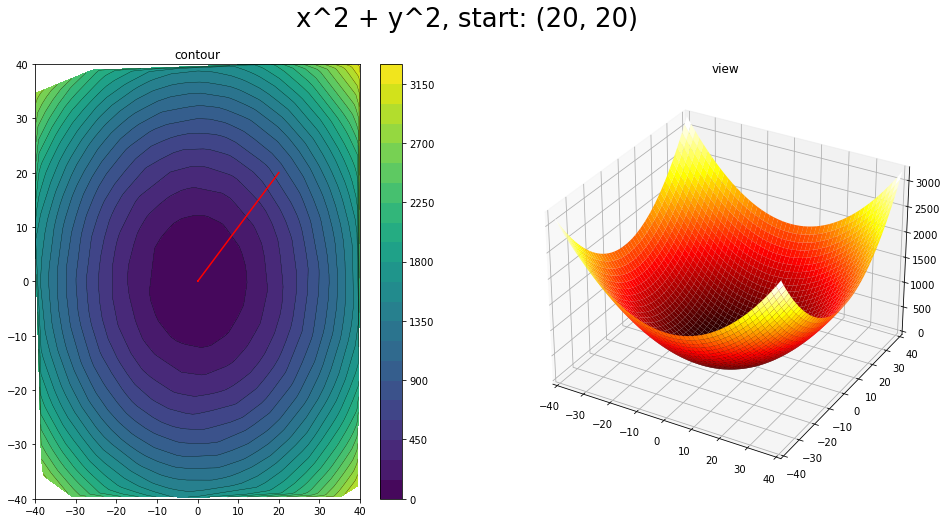

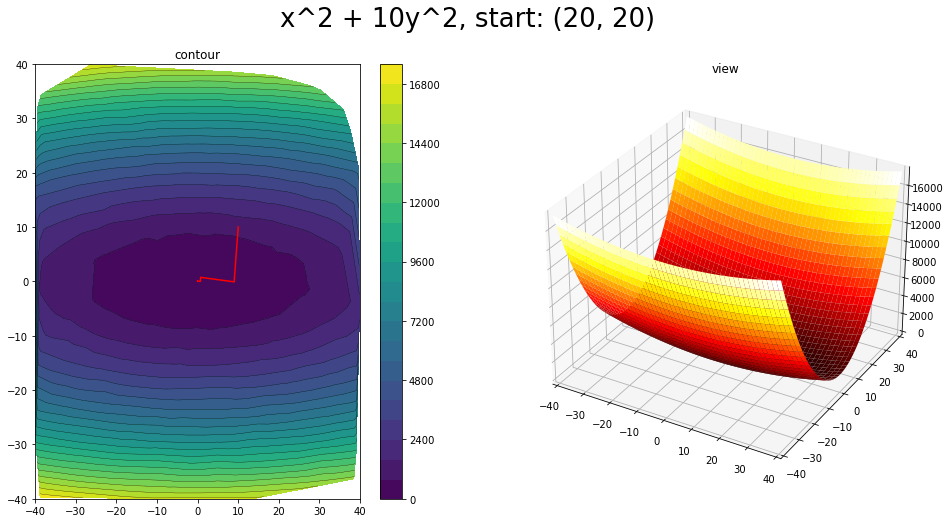

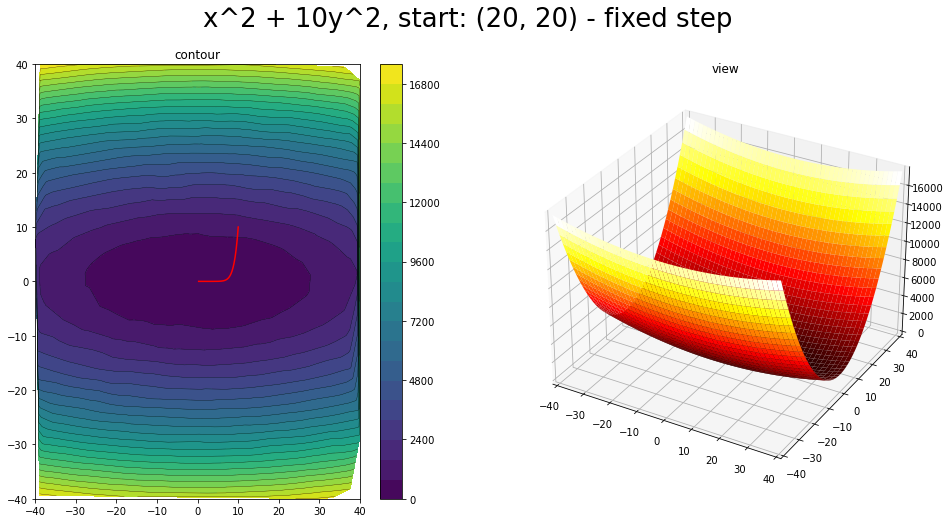

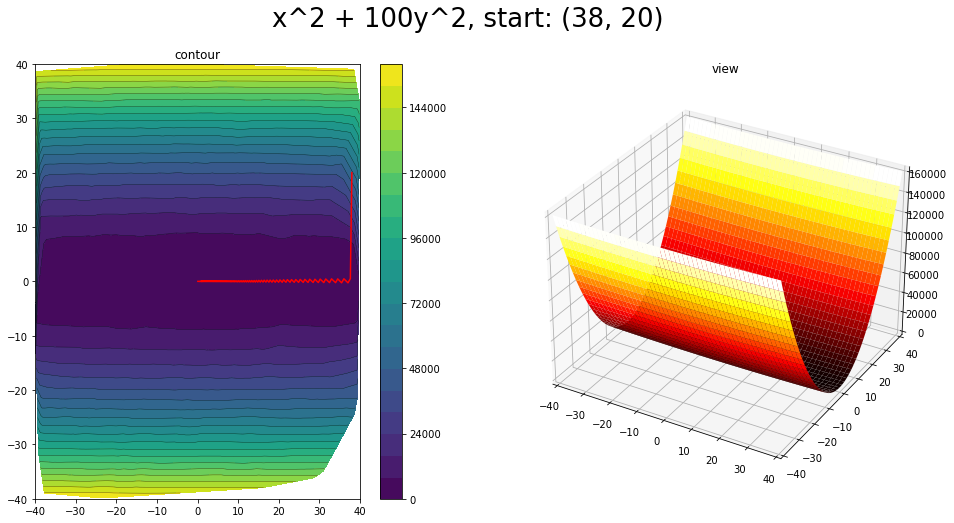

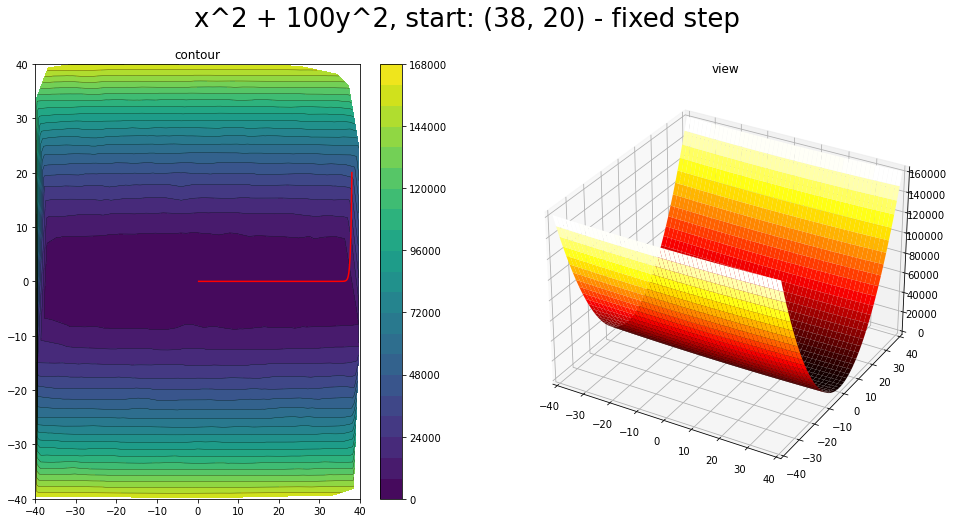

In [14]:
f = lambda x, y: x ** 2 + y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 2 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "dicho", (20,20))
trajectory("x^2 + y^2, start: (20, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 10 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 20 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "dicho", (10,10))
trajectory("x^2 + 10y^2, start: (20, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 10 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 20 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "fixed", (10,10))
trajectory("x^2 + 10y^2, start: (20, 20) - fixed step", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 100 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 200 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.001, d)
g = grad_descent(w, "dicho", (38, 20))
trajectory("x^2 + 100y^2, start: (38, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 100 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 200 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.001, d)
g = grad_descent(w, "fixed", (38, 20))
trajectory("x^2 + 100y^2, start: (38, 20) - fixed step", f, -40, 40, -40, 40, g.data)

# Часть 4. Число обусловленности

Условие Липшица для градиента: \\(f'(x): \|f'(x) - f'(y)\| <= L \cdot \|x - y\|\\)

Сильно выпуклая функция с константой \\(\Lambda\\): \\(f(x + y) >= f(x) + \langle f'(x), y\rangle + \frac{\Lambda}{2} \cdot \|y^2\|\\)

Число обусловленности: \\(k = \frac{L}{\Lambda}\\)

In [15]:
def gen_random_quad(n, k):
    a = random.uniform(1, k)
    b = k / a
    (L, La) = (max(a, b), min(a, b))
    a = [random.uniform(La, L) for i in range(n)]
    if n == 1:
        return (
            lambda x: a[0] * x ** 2, 
            [
                lambda x: 2 * a[0] * x,
            ]
        )
    elif n == 2:
        return (
            lambda x, y: a[0] * x ** 2 + a[1] * y ** 2,
            [
                lambda x, y: 2 * a[0] * x,
                lambda x, y: 2 * a[1] * y,
            ]
        )
    elif n == 3:
        return (
            lambda x, y, z: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2,
            [
                lambda x, y, z: 2 * a[0] * x,
                lambda x, y, z: 2 * a[1] * y,
                lambda x, y, z: 2 * a[2] * z,
            ]
        )
    elif n == 4:
        return (
            lambda x, y, z, p: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2 + a[3] * p ** 2,
            [
                lambda x, y, z, p: 2 * a[0] * x,
                lambda x, y, z, p: 2 * a[1] * y,
                lambda x, y, z, p: 2 * a[2] * z,
                lambda x, y, z, p: 2 * a[3] * p,
            ]
        )
    elif n == 5:
        return (
            lambda x, y, z, p, t: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2 + a[3] * p ** 2 + a[4] * t ** 2,
            [
                lambda x, y, z, p, t: 2 * a[0] * x,
                lambda x, y, z, p, t: 2 * a[1] * y,
                lambda x, y, z, p, t: 2 * a[2] * z,
                lambda x, y, z, p, t: 2 * a[3] * p,
                lambda x, y, z, p, t: 2 * a[4] * t,
            ]
        )
    elif n == 6:
        return (
            lambda x, y, z, p, t, q: a[0] * x ** 2 + a[1] * y ** 2 + a[2] * z ** 2 + a[3] * p ** 2 + a[4] * t ** 2 + a[5] * q ** 2,
            [
                lambda x, y, z, p, t, q: 2 * a[0] * x,
                lambda x, y, z, p, t, q: 2 * a[1] * y,
                lambda x, y, z, p, t, q: 2 * a[2] * z,
                lambda x, y, z, p, t, q: 2 * a[3] * p,
                lambda x, y, z, p, t, q: 2 * a[4] * t,
                lambda x, y, z, p, t, q: 2 * a[5] * q,
            ]
        )
    else:
        assert False

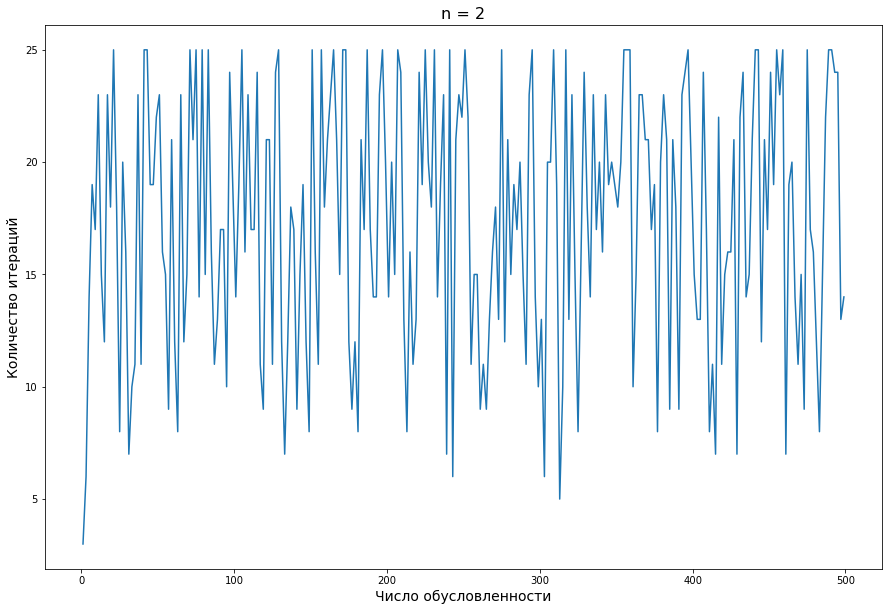

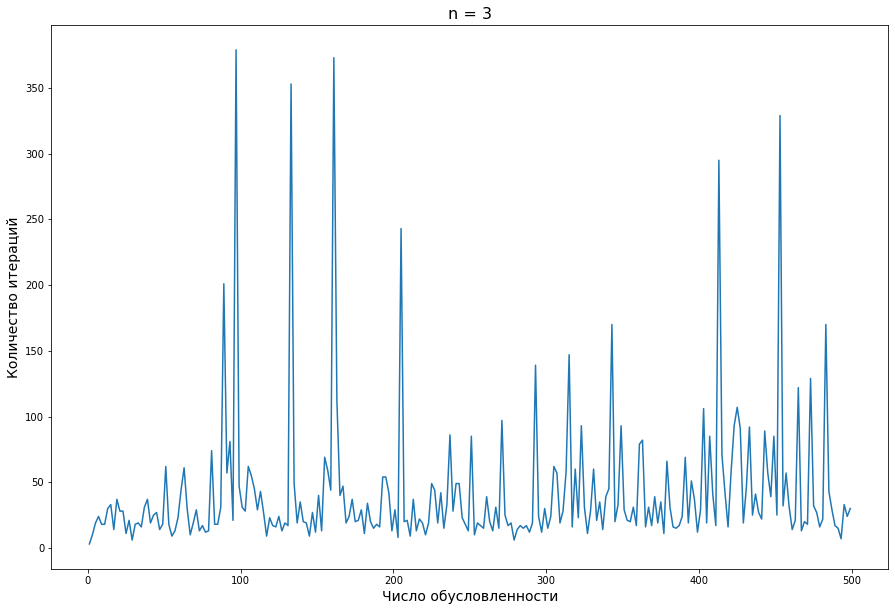

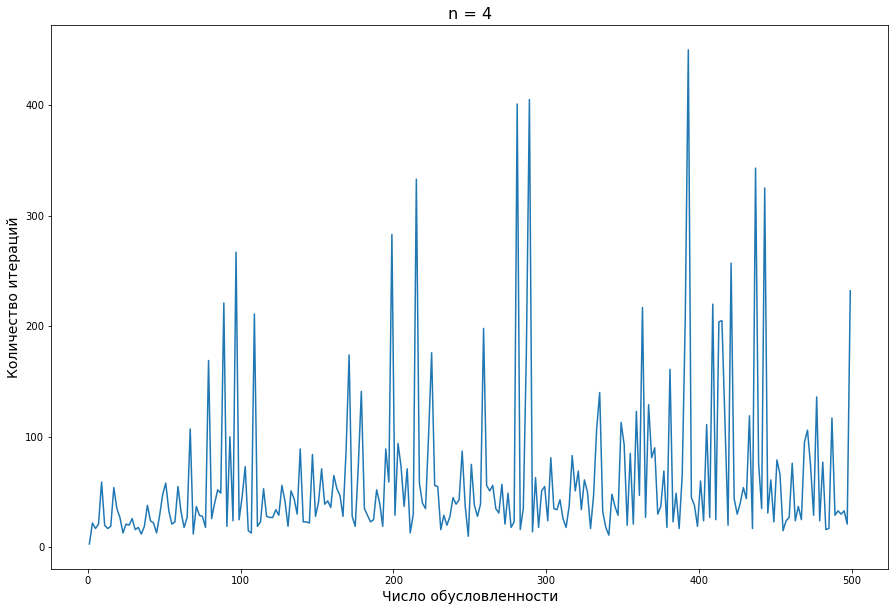

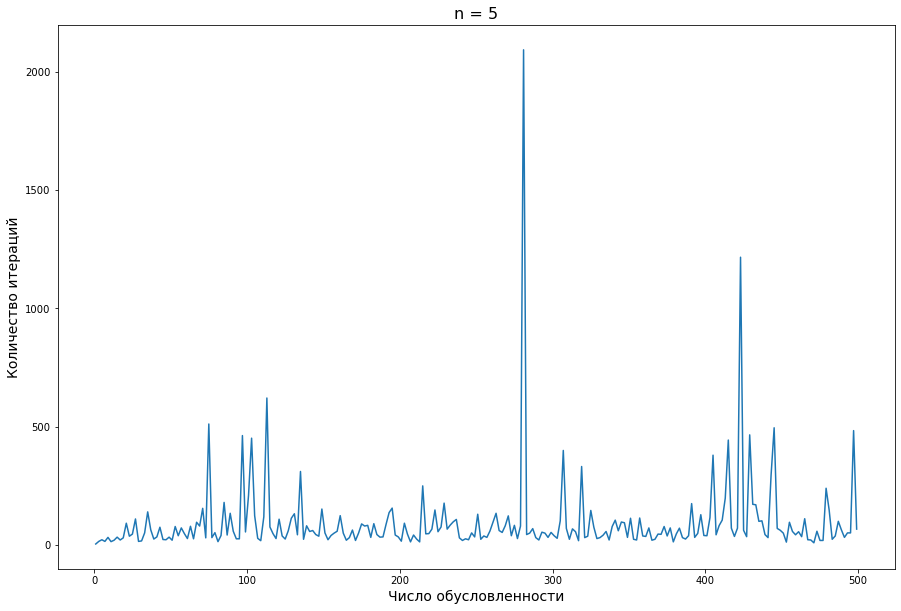

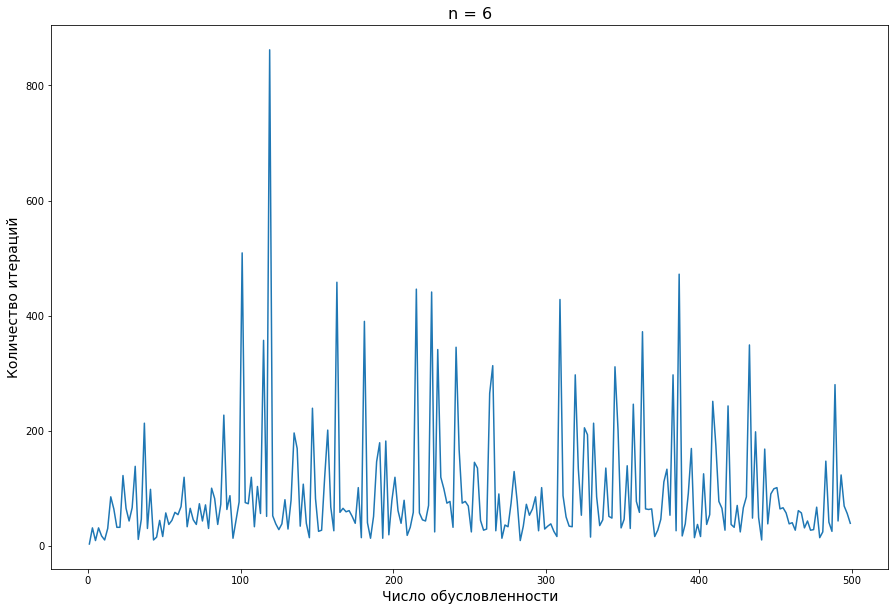

In [16]:
for i in range(1, 6):
    eps = 0.00000001
    border = 1000
    fig = plt.figure(figsize=(15,10))
    (x, y) = ([], [])
    for j in range(0, 500, 2):
        q = gen_random_quad(i + 1, j + 1)
        w = FunctionWrapper("", q[0], -math.inf, math.inf, eps, q[1])
        g = grad_descent(w, "golden", tuple([border for some in range(0, i + 1)]))
        x.append(j + 1)
        y.append(g.iterations)
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    plt.title("n = " + str(i + 1), fontsize=16)
    plt.ylabel("Количество итераций", fontsize=14)
    plt.xlabel("Число обусловленности", fontsize=14)
    plt.show()
    print()